In [171]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [172]:
df = pd.read_csv('C:/Users/ssy/Documents/ALL-10WELLS.csv', na_values=-999.25)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273465 entries, 0 to 273464
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   WELL    273465 non-null  object 
 1   DEPTH   273465 non-null  float64
 2   GR      271417 non-null  float64
 3   DT      206079 non-null  float64
 4   RHOB    166948 non-null  float64
 5   DRHO    166905 non-null  float64
 6   NPHI    98660 non-null   float64
dtypes: float64(6), object(1)
memory usage: 14.6+ MB


In [174]:
df = df.dropna()

# Building a model

In [175]:
anomaly_inputs = ['DT', 'RHOB']

In [176]:
model_IF = IsolationForest(contamination=0.1, random_state=42)

In [177]:
model_IF.fit(df[anomaly_inputs])

C:\Users\ssy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [178]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])

In [179]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [180]:
df.loc[:, ['DT', 'RHOB', 'anomaly_scores', 'anomaly']]

,DT,RHOB,anomaly_scores,anomaly
313,142.997253,2.166081,0.029888,1
314,142.985779,2.169725,0.023997,1
315,143.057068,2.171620,0.020094,1
316,143.203918,2.171570,0.021547,1
317,143.319092,2.170743,0.021186,1
...,...,...,...,...
267601,193.102966,1.746515,-0.156067,-1
267602,193.323059,1.722515,-0.168288,-1
267603,193.758575,1.704896,-0.178133,-1
267604,194.513550,1.695692,-0.183210,-1


Outlier Method: Isolation Forest
Number of anomalous values 9386
Number of non anomalous values 84483
Total Numbers of Values 93869


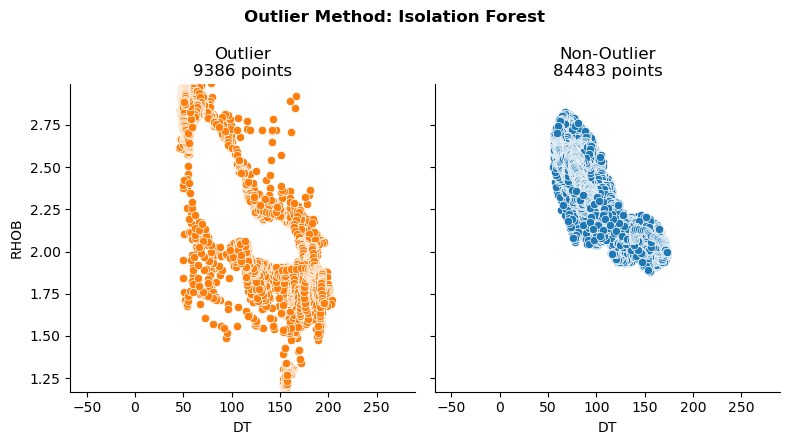

In [188]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values {len(data[data['anomaly']== 1])}")
    print(f'Total Numbers of Values {len(data)}')
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outlier\n{len(data[data['anomaly']==-1])} points")
    axes[1].set_title(f"Non-Outlier\n{len(data[data['anomaly']== 1])} points")
    return g
outlier_plot(df, "Isolation Forest", "DT", "RHOB", [-67, 290], [1.17, 2.99])
plt.show() # display the plot on screen

In [194]:
anomaly_inputs = ['DT', 'GR', 'RHOB','NPHI']

In [200]:
model_IF = IsolationForest(contamination=0.2, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

C:\Users\ssy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 18774
Number of non anomalous values 75095
Total Numbers of Values 93869


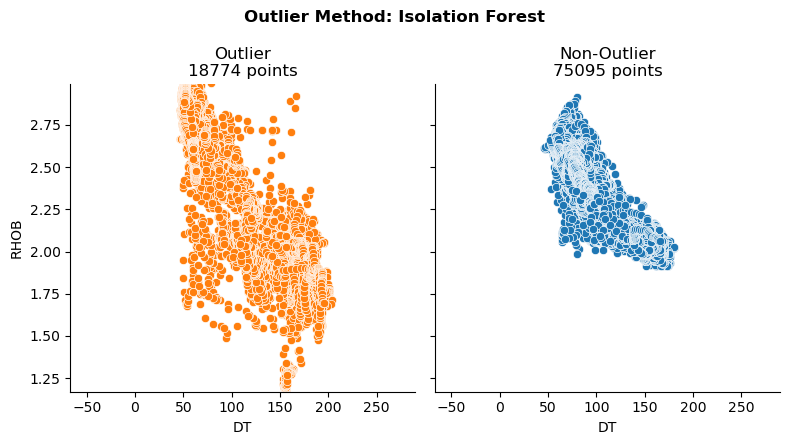

In [201]:
outlier_plot(df, "Isolation Forest", "DT", "RHOB", [-67, 290], [1.17, 2.99])
plt.show() # display the plot on screen

In [202]:
palette = ['#ff7f0e','#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

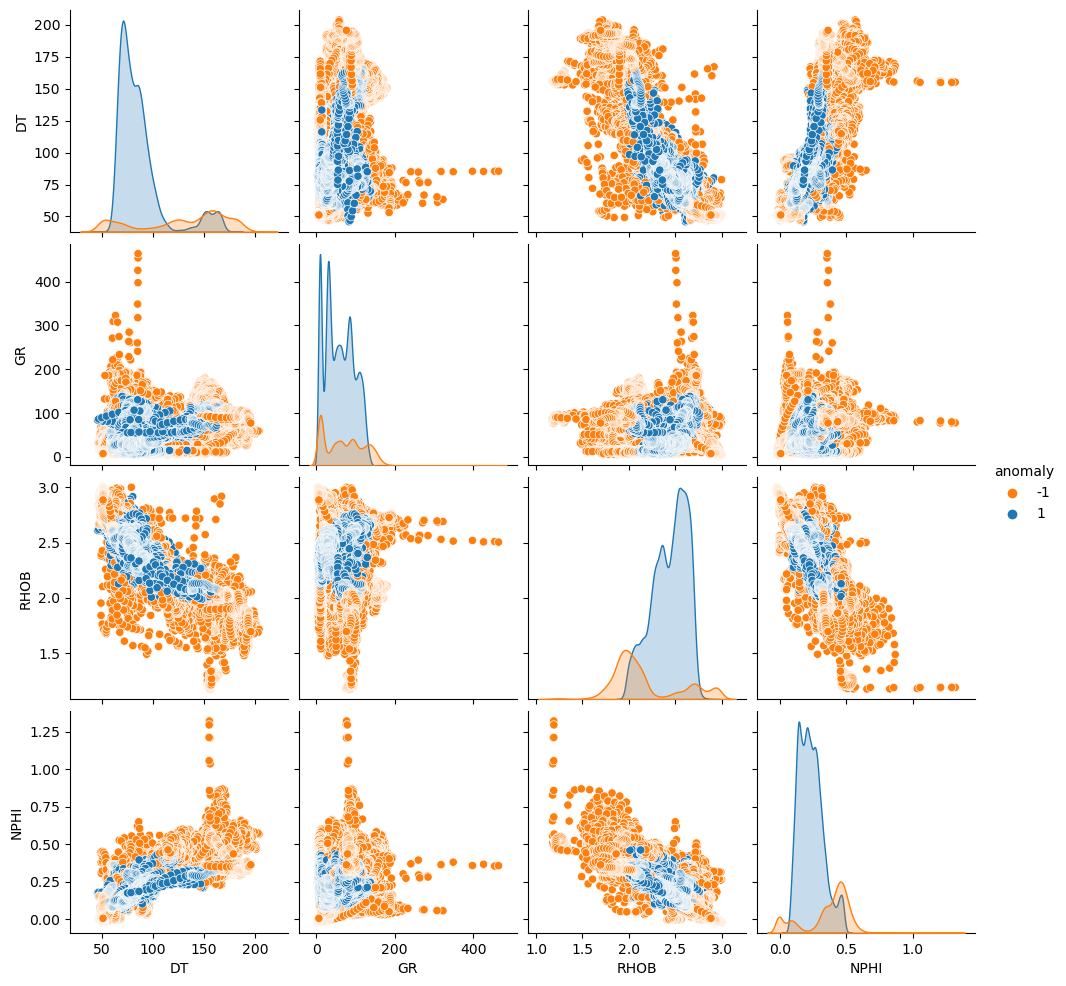

In [203]:
plt.show()